In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def load_results(model_name):

    results = pd.read_csv(f"../results{model_name}.csv")
    # results = results.drop(results[results['tuning'] != 'standard'].index)

    fig, ax = plt.subplots(figsize=(20, 5))

    # sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning', 'inv_L_prop']].apply(
    # lambda row: f"{row.integrator}, {row.preconditioning}, {row.inv_L_prop}", axis=1), ax=ax)

    results = results.drop(results[results['inv_L_prop'] != 0.0].index)
    sns.barplot(data=results, x="sampler", y="ESS", hue=results[['integrator', 'preconditioning']].apply(
    lambda row: f"{row.integrator}, {row.preconditioning}", axis=1), ax=ax)

    plt.xlabel("Sampler")
    plt.ylabel("ESS")
    plt.title(model_name)
    plt.show()
    plt.show()
    display(results)


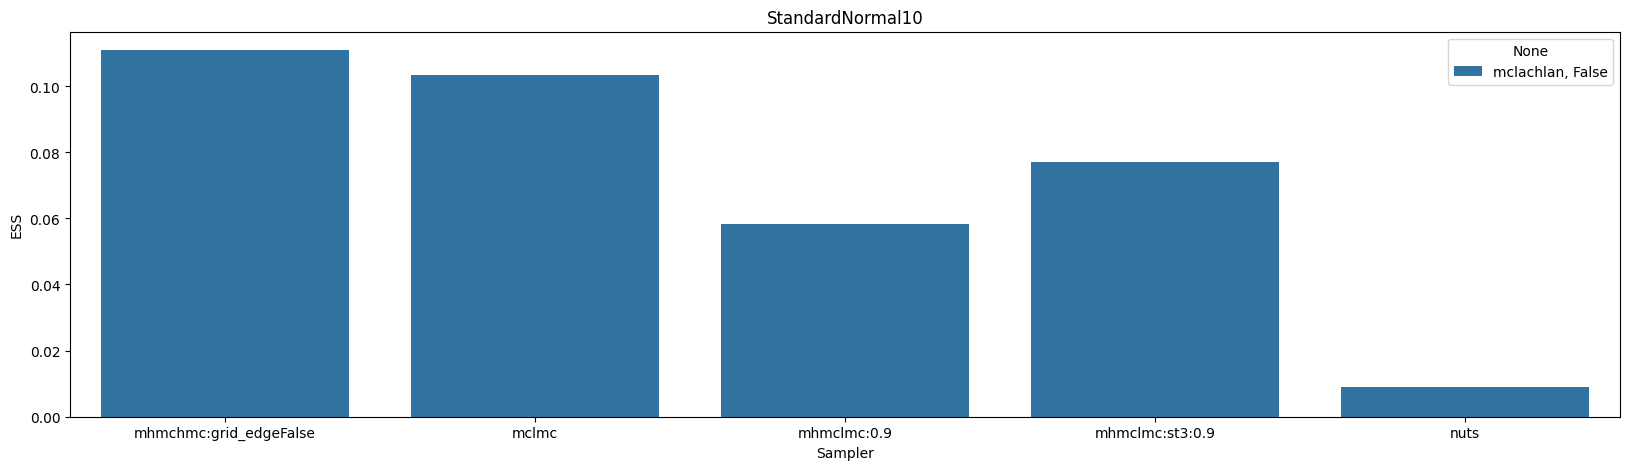

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,StandardNormal,10,mhmchmc:grid_edgeFalse,4.670475,4.614420,mclachlan,gridsearch,0.941468,False,0.0,0.429564,NaN,2000,0.111011
1,StandardNormal,10,mclmc,2.637351,3.585087,mclachlan,standard,1.000000,False,0.0,0.403226,NaN,2000,0.103520
2,StandardNormal,10,mhmclmc:0.9,3.145472,2.859519,mclachlan,standard,0.987079,False,0.0,0.237982,NaN,2000,0.058200
3,StandardNormal,10,mhmclmc:st3:0.9,4.040694,3.673357,mclachlan,standard,0.970466,False,0.0,0.317864,NaN,2000,0.077172
4,StandardNormal,10,nuts,0.000000,0.000000,mclachlan,standard,0.808576,False,0.0,0.031424,NaN,2000,0.008819


In [12]:
load_results("StandardNormal10")

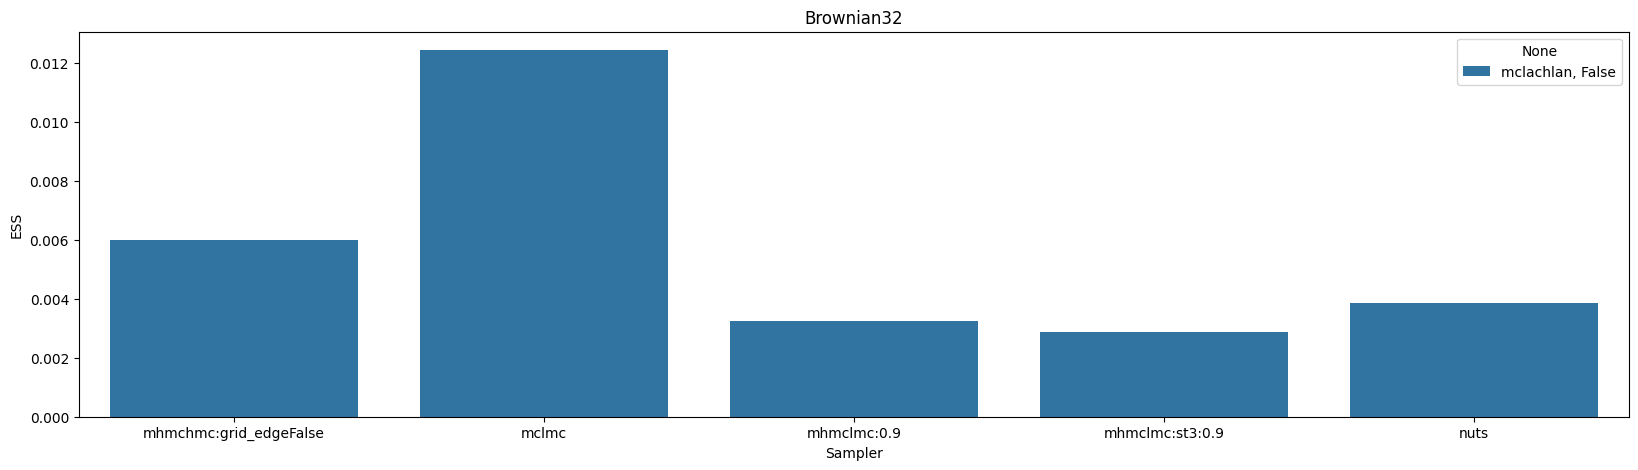

,model,dims,sampler,L,step_size,integrator,tuning,acc_rate,preconditioning,inv_L_prop,ess_avg,inv_ess_corr,num_steps,ESS
0,Brownian,32,mhmchmc:grid_edgeFalse,2.379265,0.382358,mclachlan,gridsearch,0.827955,False,0.0,0.038446,NaN,20000,0.005987
1,Brownian,32,mclmc,2.231286,0.311349,mclachlan,standard,1.000000,False,0.0,0.072464,NaN,20000,0.012447
2,Brownian,32,mhmclmc:0.9,0.824557,0.404582,mclachlan,standard,0.845007,False,0.0,0.020186,NaN,20000,0.003257
3,Brownian,32,mhmclmc:st3:0.9,5.796056,0.295732,mclachlan,standard,0.885229,False,0.0,0.018157,NaN,20000,0.002863
4,Brownian,32,nuts,0.000000,0.000000,mclachlan,standard,0.791696,False,0.0,0.017400,NaN,20000,0.003868


In [9]:
# load_results("IllConditionedGaussian")
load_results("Brownian32")
# load_results("Funnel")
# load_results("Banana")
# load_results("StochasticVolatility")
# load_results("GermanCredit")

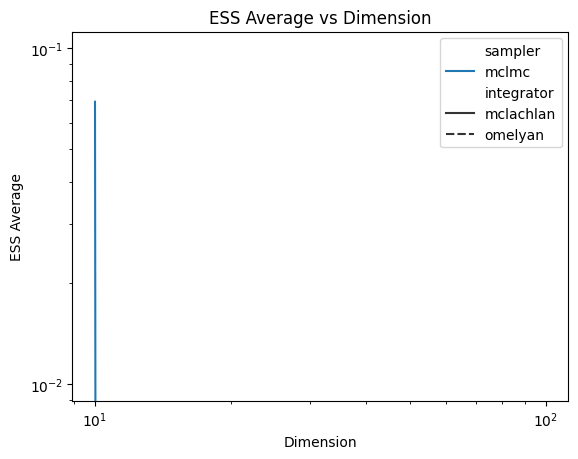

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../omelyan.csv')

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')

plot = sns.lineplot(data=df, x="dims", y="ESS", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


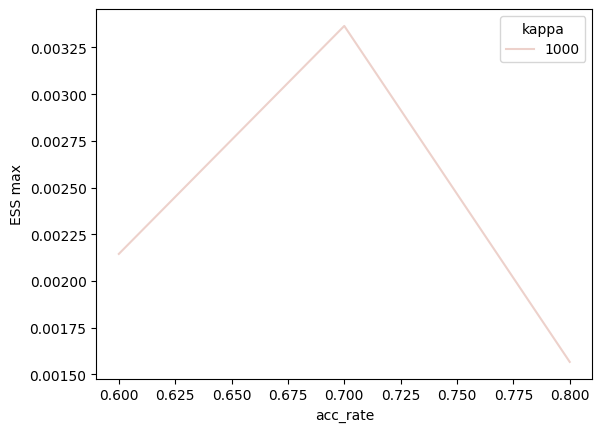

,model,dims,kappa,target_acc_rate,true_rate,sampler,integrator,L,step_size,ess
0,StandardNormal,100,1000,0.6,0.676008,mclmc,mclachlan,77.913822,19.447590,0.002144
1,StandardNormal,100,1000,0.7,0.787228,mclmc,mclachlan,104.263889,17.586784,0.003365
2,StandardNormal,100,1000,0.8,0.837254,mclmc,mclachlan,82.475178,15.956084,0.001566


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('../grid_search_L.csv')
# df 
# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')


plot = sns.lineplot(data=df, x="target_acc_rate", y="ess", hue="kappa")
# plot.set(xscale='log')
# plot.set(yscale='log')
plt.xlabel('acc_rate')
plt.ylabel('ESS max')
# plt.title('ESS Average vs Dimension')
plt.show()

df

In [62]:
numbers = """ 
45.45454406738281
45.45454406738281
11.862896919250488
31.89065933227539
5.072055339813232
15.267644882202148
45.45454406738281
7.749114513397217
27.06842613220215
4.056709289550781
13.477084159851074
41.196388244628906
6.303554534912109
22.27597427368164
3.946521520614624
12.014479637145996
34.22699737548828
5.601631164550781
19.080039978027344
45.45454406738281
10.855746269226074
26.74000358581543
4.763664722442627
15.482414245605469
45.45454406738281
9.068830490112305
22.35006332397461
10.363887786865234
27.78633689880371
6.321284294128418
19.1658992767334
4.253580093383789
12.151947021484375
35.679927825927734
7.427263259887695
15.088501930236816
36.82351303100586
7.946370601654053
22.456039428710938
45.45454406738281
13.895858764648438
30.041643142700195
6.8750128746032715
18.723833084106445
22.617324829101562
40.117530822753906
9.533771514892578
25.192203521728516
7.068187713623047
14.79380989074707
38.22208786010742
9.52573013305664
24.376811981201172
6.205139636993408
15.297362327575684
14.772479057312012
20.242847442626953
45.45454406738281
13.221456527709961
32.43273162841797
8.721331596374512
15.928102493286133
38.418251037597656
10.556085586547852
23.419403076171875
45.45454406738281
15.378687858581543
27.90255355834961
8.065345764160156
18.87344741821289
43.764915466308594
12.69785213470459
20.614234924316406
45.45454406738281
13.937968254089355
23.55646324157715
32.38990783691406
9.768387794494629
21.96673583984375
32.617431640625
10.008565902709961
22.239591598510742
9.900789260864258
17.42715072631836
38.18885040283203
12.034544944763184
26.225444793701172
8.53471851348877
18.495742797851562
26.50191879272461
11.504711151123047
24.643455505371094
14.355786323547363
19.266237258911133
40.46876907348633
13.398702621459961
17.89809226989746
34.94728088378906
11.73746109008789
23.008155822753906
45.45454406738281
16.232751846313477
33.54252624511719
11.515279769897461
23.6893310546875
8.816390991210938
18.053260803222656
7.525951862335205
12.738821029663086
21.03443145751953
24.666139602661133
34.033973693847656
12.112920761108398
24.310176849365234
22.79355239868164
8.239733695983887
14.932190895080566
29.643817901611328
10.792095184326172
15.968316078186035
20.119647979736328
39.51569747924805
14.574304580688477
27.791629791259766
11.19214153289795
21.153305053710938
15.79132080078125
30.543365478515625
21.882064819335938
8.40140438079834
16.214656829833984
31.159534454345703
11.883243560791016
20.00005340576172
29.21122932434082
11.25018310546875
21.418912887573242
11.720401763916016
18.360143661499023
34.691162109375
13.54598617553711
25.51815414428711
20.65650749206543
27.42401885986328
10.84918212890625
16.988744735717773
29.05475425720215
12.203261375427246
22.69283676147461
12.27137565612793
17.95238494873047
33.165592193603516
13.38396167755127
24.659154891967773
38.86701583862305
15.798614501953125
10.886249542236328
19.85322380065918
21.133268356323242
37.283836364746094
15.345815658569336
27.8813533782959
11.542862892150879
17.596878051757812
9.284276008605957
14.388627052307129
23.057573318481445
9.661504745483398
17.32436180114746
20.351701736450195
35.53157424926758
15.005025863647461
26.796375274658203
45.45454406738281
20.26647186279297
15.612724304199219
22.853824615478516
31.36602210998535
45.45454406738281
23.784923553466797
12.188989639282227
21.495269775390625
37.80110168457031
16.37344741821289
21.121109008789062
36.991615295410156
16.12064552307129
28.175748825073242
12.429790496826172
21.680259704589844
10.213768005371094
14.258573532104492
17.007312774658203
19.57294464111328
20.30202293395996
22.623943328857422
34.611793518066406
15.406909942626953
24.165760040283203
14.640984535217285
25.170921325683594
11.319543838500977
15.928853988647461
27.28008270263672
12.304765701293945
15.686997413635254
16.061819076538086
27.37683868408203
15.352109909057617
26.10879898071289
15.91493034362793
17.04869842529297
28.888059616088867
23.82720184326172
29.671268463134766
33.82408905029297
15.777057647705078
26.588764190673828
43.605506896972656
20.146759033203125
15.090710639953613
16.28669548034668
27.297616958618164
12.952568054199219
21.67353630065918
10.124539375305176
16.27356719970703
10.644865989685059
17.74492645263672
29.520160675048828
13.883734703063965
19.633602142333984
17.653810501098633
29.250591278076172
13.843700408935547
22.903034210205078
12.231752395629883
18.000520706176758
29.67775535583496
14.144475936889648
23.286102294921875
11.137689590454102
15.257758140563965
24.60504913330078
40.312015533447266
19.358814239501953
25.930416107177734
15.404268264770508
25.1666259765625
13.11080551147461
16.856029510498047
27.45894432067871
13.62027359008789
14.67932415008545
23.009822845458984
37.329376220703125
18.193265914916992
23.597700119018555
36.178871154785156
17.70136833190918
28.35691261291504
13.956998825073242
22.526334762573242
11.877935409545898
17.469425201416016
17.501821517944336
25.25979995727539
17.28098487854004
27.741352081298828
13.77700138092041
20.83138656616211
33.34849548339844
17.125944137573242
24.317602157592773
33.9852180480957
16.957094192504883
25.34444236755371
16.03733253479004
25.44772720336914
26.774248123168945
15.56095027923584
24.72754669189453
39.23386001586914
19.751466751098633
31.302492141723633
15.799680709838867
25.011001586914062
13.415250778198242
15.715095520019531
24.821712493896484
14.44051742553711
22.231914520263672
35.000770568847656
17.817949295043945
28.03481101989746
14.309418678283691
14.592398643493652
22.34563636779785
35.04581069946289
17.954139709472656
28.12834930419922
14.627928733825684
22.206073760986328
11.857145309448242
18.536529541015625
14.579973220825195
16.55618667602539
16.33306312561035
25.234272003173828
39.26985168457031
20.340373992919922
31.621858596801758
16.4166259765625
19.749422073364258
30.6435489654541
15.961491584777832
24.741506576538086
12.993931770324707
17.11268424987793
16.106250762939453
24.901004791259766
13.39458179473877
20.687755584716797
12.976476669311523
17.556489944458008
27.053794860839844
14.766011238098145
18.38135528564453
28.27010726928711
17.716793060302734
27.215866088867188
35.87781524658203
18.975440979003906
12.663408279418945
17.844728469848633
26.43024444580078
14.036256790161133
21.47783660888672
14.847448348999023
22.690349578857422
14.147022247314453
21.595901489257812
13.340497970581055
20.342557907104492
12.515946388244629
18.1993350982666
18.694690704345703
14.715988159179688
22.37244987487793
12.016969680786133
15.665689468383789
23.571670532226562
23.439632415771484
23.418121337890625
24.24786376953125
36.69444274902344
19.809309005737305
29.95258140563965
16.200366973876953
24.47539520263672
17.847068786621094
19.576824188232422
29.52116584777832
16.031295776367188
24.15499496459961
36.35312271118164
19.78267478942871
23.482595443725586
13.157461166381836
19.77745819091797
15.008532524108887
22.532495498657227
32.78749465942383
17.94147300720215
26.38030242919922
14.4625825881958
21.657947540283203
32.40016555786133
17.796857833862305
19.53986930847168
29.19103240966797
16.072046279907227
23.992162704467773
15.084264755249023
21.52777671813965
28.028629302978516
15.70889949798584
19.099533081054688
23.585826873779297
21.176456451416016
21.9559326171875
17.118755340576172
25.427797317504883
15.620952606201172
11.296985626220703
10.10457706451416
14.989930152893066
11.563783645629883
11.90308952331543
17.629512786865234
17.104656219482422
25.29889678955078
16.21876335144043
17.748125076293945
26.213035583496094
25.550901412963867
37.68663024902344
21.127357482910156
22.996688842773438
14.357894897460938
17.14089584350586
25.21307945251465
28.028701782226562
41.206626892089844
23.20623207092285
34.09395217895508
19.229970932006836
26.115093231201172
14.892292976379395
21.80455780029297
31.966699600219727
18.090099334716797
23.363990783691406
14.565953254699707
21.3272705078125
15.77793025970459
16.75004005432129
23.50714683532715
34.34173583984375
19.531116485595703
28.514911651611328
36.34990692138672
20.710535049438477
20.33289337158203
20.209617614746094
29.442848205566406
16.820432662963867
24.48992347717285
14.3029146194458
16.34752082824707
20.10696792602539
29.22148323059082
16.754745483398438
23.969348907470703
21.152328491210938
26.990650177001953
15.531705856323242
18.16807746887207
26.33243179321289
38.135494232177734
21.963184356689453
31.788869857788086
18.332910537719727
21.489696502685547
31.067787170410156
17.948545455932617
25.933094024658203
15.012197494506836
14.672018051147461
21.17892074584961
18.912921905517578
27.272539138793945
19.10597801208496
11.263569831848145
11.40595817565918
12.218653678894043
10.90681266784668
11.779407501220703
14.049817085266113
20.205121994018555
29.035551071166992
17.029685974121094
19.588733673095703
28.119525909423828
18.011796951293945
18.671567916870117
21.706989288330078
31.111602783203125
24.623733520507812
14.890833854675293
20.857194900512695
29.85175323486328
17.593372344970703
20.733932495117188
19.724369049072266
28.191747665405273
40.265628814697266
23.66712188720703
16.668964385986328
19.840513229370117
26.868698120117188
38.310665130615234
22.57752227783203
15.125971794128418
21.556976318359375
30.701072692871094
18.13389015197754
17.54009437561035
18.68488311767578
17.4930477142334
24.875802993774414
16.525611877441406
18.95905113220215
26.688026428222656
37.88500213623047
22.47382164001465
18.83173179626465
26.714706420898438
15.888925552368164
12.778521537780762
11.907356262207031
15.857669830322266
22.462234497070312
13.473068237304688
13.247326850891113
18.749473571777344
17.993268966674805
25.44283103942871
17.293617248535156
24.438640594482422
14.61467456817627
19.937793731689453
23.573631286621094
33.26127624511719
19.914928436279297
28.085561752319336
16.834379196166992
22.681110382080078
17.417949676513672
24.53626251220703
16.155197143554688
22.74481964111328
23.85431480407715
33.55172348022461
20.181896209716797
19.628841400146484
27.587848663330078
18.24481773376465
15.50141429901123
19.788755416870117
27.77849578857422
16.770578384399414
22.787967681884766
17.415769577026367
24.267578125
32.50191116333008
19.65669822692871
27.535293579101562
38.54881286621094
23.34112548828125
14.749448776245117
15.340240478515625
21.461641311645508
14.639581680297852
13.54769229888916
13.5889892578125
18.991308212280273
26.525928497314453
16.20832633972168
19.620635986328125
24.956188201904297
34.80893325805664
21.19712257385254
29.553010940551758
18.04585838317871
25.148643493652344
19.981874465942383
17.36725616455078
11.774971008300781
16.39693832397461
12.789508819580078
12.956938743591309
16.279870986938477
15.864245414733887
22.054903030395508
13.846248626708984
17.647485733032227
22.66424560546875
31.464229583740234
19.29773712158203
18.253185272216797
25.3242130279541
17.643312454223633
24.46544647216797
15.239635467529297
15.831026077270508
21.936552047729492
17.762897491455078
24.597915649414062
23.276611328125
32.208885192871094
19.84919548034668
19.509029388427734
26.977886199951172
17.004056930541992
23.504108428955078
22.3452205657959
14.216791152954102
16.663877487182617
22.926193237304688
31.64093780517578
19.57561492919922
27.00613021850586
21.068666458129883
23.197158813476562
18.9100341796875
26.061731338500977
16.169755935668945
17.062454223632812
23.499279022216797
17.008460998535156
18.761842727661133
20.432212829589844
24.279998779296875
29.709407806396484
40.83738708496094
25.403928756713867
16.103885650634766
17.47333526611328
24.004154205322266
15.268115043640137
20.72795867919922
28.45024299621582
22.773460388183594
16.324373245239258
22.39368438720703
14.211402893066406
18.631017684936523
18.180570602416992
20.27940559387207
27.780601501464844
25.784849166870117
16.17713165283203
22.148683547973633
15.823649406433105
21.6546630859375
16.46159553527832
22.5162296295166
30.783111572265625
19.313695907592773
17.50603675842285
23.92093276977539
20.184005737304688
19.071611404418945
19.0125789642334
19.1501407623291
26.13497543334961
35.65082931518555
22.43561363220215
28.6783504486084
26.191564559936523
21.194944381713867
26.184528350830078
21.390100479125977
29.135456085205078
39.667236328125
25.02968406677246
17.599164962768555
23.95334815979004
15.230518341064453
18.094100952148438
24.609712600708008
19.5030574798584
18.66593360900879
16.07150650024414
20.733997344970703
25.765214920043945
18.4168701171875
25.009044647216797
15.950957298278809
17.430532455444336
23.2615966796875
31.554567337036133
20.027055740356445
27.157840728759766
36.81146240234375
23.38376235961914
14.864779472351074
17.19330596923828
23.29217529296875
18.124942779541016
24.542694091796875
15.625686645507812
17.609554290771484
20.462629318237305
27.681835174560547
37.43195343017578
23.861766815185547
16.55750846862793
14.220831871032715
19.22232437133789
13.80105972290039
13.330536842346191
17.964942932128906
24.258705139160156
15.514891624450684
13.813220024108887
15.096670150756836
18.451807022094727
24.101539611816406
27.907329559326172
18.508411407470703
19.53428840637207
19.868816375732422
26.77181053161621
17.20648193359375
18.163230895996094
23.76263427734375
15.564055442810059
20.953439712524414
20.84059715270996
14.63487720489502
19.691299438476562
13.202685356140137
14.237061500549316
18.456241607666016
22.459232330322266
18.976240158081055
25.497215270996094
34.245357513427734
22.053783416748047
29.61155128479004
19.085430145263672
25.618255615234375
23.065338134765625
29.981931686401367
19.34419822692871
25.94483757019043
26.722509384155273
18.75987434387207
25.146831512451172
17.009571075439453
21.648422241210938
28.99906349182129
38.830543518066406
25.114267349243164
16.3360538482666
21.85605239868164
20.090139389038086
14.607063293457031
19.390369415283203
15.577920913696289
20.835683822631836
15.42549991607666
16.825422286987305
22.490224838256836
29.848243713378906
19.512081146240234
26.0640926361084
16.950448989868164
22.635812759399414
30.216766357421875
19.640586853027344
13.193305969238281
12.873153686523438
12.465341567993164
16.630958557128906
22.18038558959961
29.57059669494629
19.258045196533203
25.66739845275879
16.79486656188965
11.900368690490723
15.155926704406738
20.188278198242188
13.266496658325195
17.470457077026367
13.392135620117188
12.581557273864746
16.681901931762695
22.195293426513672
24.127487182617188
31.892013549804688
20.84774398803711
21.29184341430664
19.427865982055664
25.818418502807617
34.29881286621094
22.449872970581055
14.706459045410156
19.533416748046875
15.780970573425293
20.952245712280273
16.29634666442871
21.62843132019043
14.277585983276367
14.458142280578613
19.180065155029297
24.430591583251953
16.953258514404297
22.476051330566406
22.866363525390625
15.929587364196777
19.93616485595703
25.882083892822266
17.022323608398438
22.54407501220703
21.29529571533203
28.189563751220703
18.55580711364746
21.558887481689453
16.511606216430664
17.488126754760742
18.08574676513672
21.520355224609375
18.96245574951172
25.06901741027832
16.564821243286133
21.893646240234375
25.282991409301758
33.39664840698242
22.045761108398438
29.113174438476562
38.43342208862305
25.38741111755371
16.941669464111328
14.596263885498047
15.168169975280762
20.01523208618164
14.090860366821289
13.182137489318848
13.597661972045898
15.484910011291504
14.453475952148438
19.0538272857666
18.30980682373047
16.610523223876953
17.077028274536133
22.49549102783203
18.636823654174805
21.291458129882812
28.029844284057617
36.88889694213867
24.48086166381836
20.89150619506836
27.485883712768555
18.300048828125
18.994112014770508
18.755393981933594
21.16549301147461
20.08715057373047
26.402896881103516
17.615129470825195
19.1969051361084
19.54745864868164
19.48154067993164
25.587045669555664
33.59545135498047
22.375659942626953
19.980831146240234
19.188188552856445
21.536380767822266
19.581584930419922
25.182260513305664
17.15653419494629
18.017549514770508
22.47151756286621
29.461021423339844
19.709556579589844
25.83392333984375
18.79353904724121
23.093299865722656
30.25242042541504
29.755945205688477
19.893274307250977
26.05059814453125
18.208757400512695
23.8386173248291
22.04549789428711
14.821301460266113
13.958982467651367
17.609024047851562
22.09223747253418
15.57972240447998
14.770292282104492
19.315916061401367
23.44939613342285
17.167930603027344
15.963363647460938
20.862754821777344
15.628142356872559
15.358819961547852
20.064132690429688
13.97613525390625
12.614311218261719
16.47328758239746
17.231060028076172
22.331575393676758
24.51825714111328
31.988344192504883
21.50840950012207
26.760967254638672
34.89737319946289
23.47854232788086
18.463552474975586
24.07158088684082
31.373882293701172
21.127429962158203
17.44403648376465
16.784122467041016
20.135133743286133
17.054800033569336
22.21343994140625
16.759075164794922
21.822202682495117
28.211488723754883
24.756269454956055
32.214874267578125
21.744352340698242
23.59042739868164
30.68550682067871
20.72570037841797
26.95343589782715
20.3221492767334
26.42145538330078
18.077228546142578
23.497615814208984
15.894362449645996
18.096620559692383
23.51293182373047
23.572513580322266
19.459026336669922
25.271564483642578
17.114540100097656
22.22210693359375
15.062289237976074
17.89164161682129
19.80143165588379
25.69467544555664
20.95050811767578
27.177453994750977
19.749013900756836
20.307584762573242
26.333053588867188
34.13704299926758
23.170021057128906
15.73269271850586
19.49477767944336
18.773883819580078
17.428359985351562
20.980079650878906
19.36606216430664
21.219409942626953
27.477542877197266
18.69403648376465
24.20245361328125
31.325620651245117
21.353290557861328
26.86429214477539
18.316265106201172
21.19367027282715
26.51220703125
34.286163330078125
23.35491180419922
30.19706153869629
20.74292755126953
14.166680335998535
17.040729522705078
14.266966819763184
18.439172744750977
13.830484390258789
17.870643615722656
18.10442352294922
23.383769989013672
16.57101821899414
17.892173767089844
23.10073471069336
27.53262710571289
18.823890686035156
24.293617248535156
31.344627380371094
40.431724548339844
27.640499114990234
18.92200469970703
24.404462814331055
19.59091567993164
23.399898529052734
24.762409210205078
17.005386352539062
21.919687271118164
21.733348846435547
27.839134216308594
35.86173629760742
24.568967819213867
16.866100311279297
14.385917663574219
18.34394645690918
23.620254516601562
17.399011611938477
22.398483276367188
19.357919692993164
14.863184928894043
17.522212982177734
15.095331192016602
15.776941299438477
20.105127334594727
21.344755172729492
27.44784927368164
19.035751342773438
"""

In [63]:
numbers_floats = [float(n) for n in numbers.split("\n")[1:-1]]


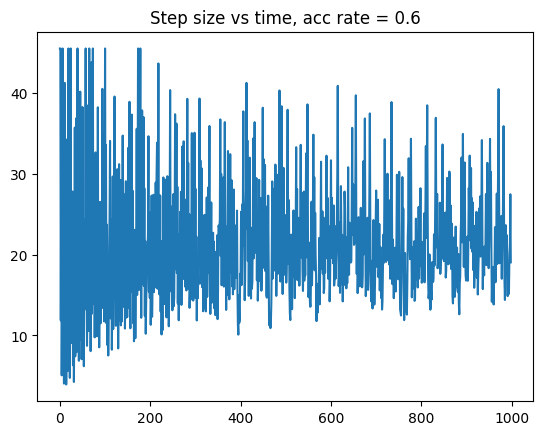

In [64]:
import matplotlib.pyplot as plt

plt.plot(numbers_floats)
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Step size vs time, acc rate = 0.6')
plt.show()


In [60]:
numbers2 = """ 
45.45454406738281
45.45454406738281
45.45454406738281
5.959798812866211
7.101480007171631
8.981182098388672
11.780220031738281
15.656052589416504
18.472190856933594
6.6125078201293945
9.08182144165039
12.533609390258789
17.30716323852539
23.868406295776367
32.83279800415039
45.00779342651367
45.45454406738281
45.45454406738281
5.568462371826172
7.682394981384277
10.547846794128418
14.412344932556152
19.594030380249023
25.259618759155273
34.010589599609375
45.45454406738281
11.661539077758789
15.688863754272461
21.002925872802734
24.537818908691406
7.924201011657715
10.575603485107422
13.911958694458008
17.974990844726562
23.701950073242188
30.10321044921875
39.36229705810547
34.99262619018555
40.616127014160156
45.45454406738281
45.45454406738281
8.12955093383789
10.589672088623047
13.75851058959961
16.901472091674805
21.80368423461914
28.02709197998047
35.09000015258789
41.9473762512207
45.45454406738281
17.692401885986328
22.579944610595703
28.725431442260742
29.467548370361328
37.30734634399414
16.028865814208984
20.308780670166016
25.313377380371094
31.88908576965332
40.060760498046875
5.697941780090332
7.21063232421875
9.098745346069336
11.441938400268555
14.36131477355957
17.95296287536621
22.418188095092773
27.92463493347168
24.10487937927246
29.940723419189453
37.10246658325195
45.45454406738281
20.93551254272461
25.902332305908203
31.976655960083008
35.93764877319336
31.844730377197266
39.13272476196289
16.12101173400879
19.841520309448242
24.370803833007812
28.58100700378418
34.97386169433594
42.714473724365234
7.475533962249756
9.177905082702637
11.236417770385742
13.742761611938477
16.55985450744629
20.18070411682129
17.783161163330078
21.573444366455078
26.189977645874023
20.303049087524414
23.405315399169922
21.496444702148438
15.39678955078125
18.025075912475586
18.672191619873047
22.549930572509766
27.190500259399414
27.708637237548828
32.88469696044922
39.50146484375
45.45454406738281
13.101531028747559
15.673128128051758
18.82577896118164
22.580326080322266
27.045686721801758
32.349422454833984
34.810760498046875
41.54142761230469
16.569664001464844
19.800973892211914
23.631290435791016
28.166004180908203
33.52812576293945
39.86099624633789
45.45454406738281
10.874137878417969
12.95484733581543
15.414599418640137
18.11580467224121
21.504241943359375
23.817768096923828
23.88471031188965
28.2755069732666
31.83344268798828
37.60659408569336
41.438926696777344
37.25605010986328
43.91722869873047
13.921385765075684
16.444528579711914
19.162857055664062
22.062450408935547
22.9318904876709
25.060514450073242
29.469192504882812
33.2059211730957
38.97416687011719
45.45454406738281
23.950180053710938
22.497264862060547
17.520469665527344
20.55280876159668
19.284313201904297
22.59364891052246
26.44605255126953
30.926633834838867
34.29515838623047
39.454654693603516
45.45454406738281
45.45454406738281
45.45454406738281
17.495040893554688
20.41815948486328
20.427623748779297
23.670101165771484
24.497140884399414
25.072406768798828
23.56276512145996
27.406267166137695
31.850494384765625
36.985347747802734
42.913551330566406
11.792614936828613
13.225473403930664
15.36837387084961
17.84427833557129
20.70277976989746
22.97280502319336
26.614673614501953
30.810447692871094
26.632091522216797
30.807214736938477
15.054512977600098
17.426477432250977
20.15724754333496
23.29888153076172
26.91068458557129
31.06016731262207
35.745906829833984
11.586551666259766
13.386128425598145
15.454286575317383
17.52169418334961
20.201515197753906
23.275257110595703
25.74862289428711
29.62920570373535
27.700328826904297
31.55255889892578
36.25450134277344
16.77423858642578
19.263404846191406
20.461292266845703
23.503196716308594
26.980188369750977
30.95205307006836
35.48652648925781
17.075416564941406
19.381629943847656
22.04302215576172
23.660572052001953
26.267995834350586
30.07177734375
27.955577850341797
28.176891326904297
32.10886001586914
36.6988639831543
41.92082214355469
21.84603500366211
23.080326080322266
26.36767578125
27.397245407104492
31.270357131958008
29.82618522644043
29.941913604736328
34.13982009887695
32.180938720703125
36.66718673706055
38.56834030151367
43.905094146728516
44.882781982421875
17.51387596130371
19.394193649291992
22.084863662719727
24.703033447265625
28.101818084716797
28.704681396484375
32.627418518066406
29.310823440551758
33.298004150390625
37.002777099609375
41.996097564697266
20.379819869995117
23.145076751708984
24.3380126953125
27.617206573486328
28.43657112121582
20.870800018310547
23.467281341552734
26.60503578186035
30.147987365722656
34.14663314819336
38.65754699707031
13.309106826782227
15.086516380310059
17.09328269958496
19.30344009399414
21.028263092041016
23.794269561767578
25.684831619262695
28.145469665527344
31.809158325195312
30.948238372802734
21.09206199645996
20.439424514770508
23.092634201049805
20.085657119750977
19.234546661376953
21.719356536865234
24.514610290527344
27.65778350830078
29.020282745361328
32.50715255737305
34.77961730957031
39.182037353515625
44.123531341552734
19.941240310668945
22.472782135009766
25.31531524658203
18.597511291503906
20.836181640625
21.95084571838379
24.577146530151367
27.65353775024414
20.085220336914062
15.106171607971191
17.000572204589844
19.084096908569336
18.037599563598633
20.281625747680664
18.69459342956543
17.247100830078125
19.382858276367188
20.04854393005371
22.517072677612305
25.280019760131836
18.166393280029297
19.127933502197266
21.468463897705078
24.08647346496582
27.013813018798828
29.80137062072754
33.39982604980469
22.336650848388672
25.035951614379883
19.559595108032227
21.91989517211914
24.314008712768555
27.22911834716797
29.345470428466797
32.84273147583008
36.74403762817383
18.231260299682617
20.408069610595703
18.65545654296875
20.874919891357422
22.826204299926758
22.720233917236328
25.402679443359375
28.39228630065918
28.25858497619629
31.56869888305664
29.371047973632812
28.885326385498047
32.25178527832031
31.5546875
31.5621280670166
35.2187385559082
39.286380767822266
17.895219802856445
19.975177764892578
22.289749145507812
21.95047378540039
23.23036766052246
25.904111862182617
28.87655258178711
26.2073974609375
22.389995574951172
24.9526424407959
27.800033569335938
30.175729751586914
33.599857330322266
37.40120315551758
41.62013244628906
16.143604278564453
17.98013687133789
19.861618041992188
19.75794219970703
21.98955535888672
24.46599006652832
27.213302612304688
29.22177505493164
30.98335838317871
34.43632125854492
38.26310729980469
41.88093948364258
38.76018142700195
36.144657135009766
40.1357307434082
42.51529312133789
45.45454406738281
18.697620391845703
20.767065048217773
21.46410369873047
22.993913650512695
25.5230712890625
28.322614669799805
26.301097869873047
29.176803588867188
27.143587112426758
30.101947784423828
33.373748779296875
36.99126434326172
28.01675033569336
30.293907165527344
33.568294525146484
37.18679428100586
30.37944221496582
33.64960861206055
37.26206970214844
41.25166702270508
45.45454406738281
20.4487247467041
17.51502799987793
19.27528953552246
18.573436737060547
20.564023971557617
19.173545837402344
20.559734344482422
16.294824600219727
16.256649017333984
15.743900299072266
17.42142677307129
19.272863388061523
21.058101654052734
22.33486557006836
24.57924461364746
23.93994903564453
26.457473754882812
22.24911117553711
21.291378021240234
21.37200355529785
18.705310821533203
20.665876388549805
21.56328773498535
22.53908920288086
24.886985778808594
18.97813606262207
19.940746307373047
19.873382568359375
21.695762634277344
22.827739715576172
21.281171798706055
23.480220794677734
14.702437400817871
16.224878311157227
17.896286010742188
19.60597038269043
21.6214599609375
23.444231033325195
25.843090057373047
28.481006622314453
31.381168365478516
34.5689582824707
38.072147369384766
20.531097412109375
22.62001609802246
23.86874771118164
23.534828186035156
25.916763305664062
28.533557891845703
28.76415252685547
31.58586311340332
34.75605010986328
38.23625183105469
40.79651641845703
44.864017486572266
45.45454406738281
37.10935974121094
24.835464477539062
20.872318267822266
16.407461166381836
17.817596435546875
19.597333908081055
21.55034637451172
23.34853744506836
25.66514015197754
27.411827087402344
29.862680435180664
20.046350479125977
22.029808044433594
23.290910720825195
25.586044311523438
27.539987564086914
30.24230194091797
29.95930290222168
27.433305740356445
28.39975357055664
31.172910690307617
31.980520248413086
35.09197998046875
36.88817596435547
39.816802978515625
41.67209243774414
45.45454406738281
37.86927032470703
41.52202224731445
45.45454406738281
20.970956802368164
21.94772720336914
24.06900405883789
26.39026641845703
25.320850372314453
27.7560977935791
30.41982078552246
24.739913940429688
26.922138214111328
29.309383392333984
32.108299255371094
35.167972564697266
28.821226119995117
27.907955169677734
29.661739349365234
32.478843688964844
35.5569953918457
38.91981506347656
28.788166046142578
31.511699676513672
34.3746337890625
25.731769561767578
28.161619186401367
30.815399169921875
33.71324157714844
35.420162200927734
25.879560470581055
28.310503005981445
18.310104370117188
20.033220291137695
21.914623260498047
23.968503952026367
21.31998062133789
19.401607513427734
20.885101318359375
22.835533142089844
14.508367538452148
15.86606502532959
17.27324104309082
18.883228302001953
20.212841033935547
22.089693069458008
24.13671112060547
26.36895179748535
28.4967098236084
30.83527183532715
33.00911331176758
36.03907775878906
22.179845809936523
23.86902618408203
25.703266143798828
27.958450317382812
30.516855239868164
33.30390930175781
30.40545654296875
18.93906021118164
20.672775268554688
22.561519622802734
22.972110748291016
25.06439208984375
27.342823028564453
29.82356834411621
29.721826553344727
32.41073226928711
35.33727264404297
35.685447692871094
38.898101806640625
28.60211944580078
31.178401947021484
15.676158905029297
17.0947322845459
18.560617446899414
20.233924865722656
22.054645538330078
22.76699447631836
24.591537475585938
26.793411254882812
29.187942504882812
31.79160499572754
32.23136901855469
30.341064453125
33.03885269165039
35.077335357666016
38.18556213378906
39.79676818847656
42.53578186035156
42.22358703613281
42.21734619140625
20.420486450195312
22.23044204711914
23.261249542236328
23.763797760009766
25.86086654663086
28.138839721679688
30.58458137512207
27.073686599731445
24.18451499938965
24.590293884277344
26.347013473510742
28.65470314025879
29.974720001220703
28.564815521240234
30.601137161254883
33.267539978027344
31.284391403198242
32.8907356262207
35.746768951416016
23.860292434692383
21.790836334228516
23.648897171020508
25.702255249023438
25.05646324157715
27.22686004638672
28.47905731201172
30.938255310058594
33.414344787597656
36.289794921875
39.40724563598633
42.78661346435547
21.135515213012695
22.403696060180664
24.331266403198242
21.81683349609375
23.691160202026367
25.722999572753906
27.073938369750977
29.38865089416504
31.896955490112305
34.614688873291016
31.05341339111328
33.695465087890625
36.55742645263672
26.227663040161133
28.457304000854492
30.872398376464844
30.19601058959961
29.463809967041016
31.741422653198242
34.423065185546875
37.32637405395508
34.125797271728516
36.99945068359375
37.477237701416016
32.231056213378906
32.92463684082031
35.68886947631836
38.680206298828125
24.125572204589844
24.687973022460938
26.759876251220703
24.819162368774414
26.898502349853516
27.45405387878418
29.74797248840332
32.229488372802734
33.25535202026367
36.02174758911133
27.627696990966797
29.92650604248047
24.995317459106445
27.073789596557617
25.663372039794922
20.758655548095703
22.48383331298828
24.349365234375
19.86322784423828
21.510692596435547
22.70307159423828
24.58050537109375
26.609933853149414
28.80340003967285
29.213695526123047
31.61566925048828
33.123592376708984
28.07238006591797
30.375900268554688
19.90552520751953
21.541900634765625
22.209758758544922
22.610013961791992
23.649303436279297
24.556758880615234
25.654476165771484
27.748151779174805
24.37078094482422
26.357568740844727
27.918529510498047
30.18791389465332
32.6379508972168
19.328229904174805
20.90135955810547
22.498558044433594
23.323312759399414
22.996028900146484
24.85866928100586
26.869070053100586
28.874956130981445
27.53063201904297
29.749746322631836
32.1440544128418
31.69350242614746
34.23874282836914
36.98420715332031
29.020872116088867
31.348154067993164
21.45911979675293
23.18244743347168
23.324234008789062
25.19297981262207
27.208393096923828
29.381755828857422
31.725200653076172
22.029924392700195
22.455028533935547
24.246631622314453
20.016357421875
21.612754821777344
23.333908081054688
22.89012908935547
22.900588989257812
23.962848663330078
25.673248291015625
27.706735610961914
28.606422424316406
30.86652374267578
33.30158615112305
30.800642013549805
24.856245040893555
26.816892623901367
28.929096221923828
17.961008071899414
19.379037857055664
20.700458526611328
22.330158233642578
23.519481658935547
24.342464447021484
26.25172996520996
28.307756423950195
30.5216064453125
26.993881225585938
27.561098098754883
29.712411880493164
30.203182220458984
32.5384635925293
35.068790435791016
33.35129165649414
35.940494537353516
35.733150482177734
37.25477981567383
39.88703536987305
37.87590026855469
40.80233383178711
36.43976593017578
39.25227355957031
42.27758026123047
26.41992950439453
28.460933685302734
27.99329376220703
28.521703720092773
30.718820571899414
32.41475296020508
34.72557067871094
37.3900146484375
40.25489044189453
21.271984100341797
22.426467895507812
18.65534019470215
20.090049743652344
21.006071090698242
21.295738220214844
15.539628028869629
16.733409881591797
18.017118453979492
18.849681854248047
20.292131423950195
21.60944175720215
23.258708953857422
24.831727981567383
26.721866607666016
28.75309944152832
30.935741424560547
33.28087615966797
34.56143569946289
29.876510620117188
31.55975914001465
31.977859497070312
34.16496276855469
36.57606506347656
39.3313102722168
24.389171600341797
25.54633903503418
26.4676570892334
28.461986541748047
27.58700180053711
28.177032470703125
30.25708770751953
32.52803039550781
32.75779724121094
35.21135711669922
37.84516525268555
27.095409393310547
21.840227127075195
21.211576461791992
22.445104598999023
24.12531852722168
22.4344482421875
24.11163330078125
25.911827087402344
27.252967834472656
29.282745361328125
29.244308471679688
31.418128967285156
33.7504768371582
34.13163757324219
35.119117736816406
37.362693786621094
40.1247444152832
43.087120056152344
45.45454406738281
27.23366355895996
28.707788467407227
30.828170776367188
33.10221481323242
35.54085922241211
37.90716552734375
39.69670486450195
42.610713958740234
45.45454406738281
45.45454406738281
45.45454406738281
36.448604583740234
39.11766052246094
41.97850036621094
45.0446662902832
32.960411071777344
34.70878982543945
35.571224212646484
38.166629791259766
36.28110885620117
38.82441329956055
41.47438049316406
37.163394927978516
39.86534118652344
24.61004638671875
24.99749183654785
26.817895889282227
27.416561126708984
29.40896987915039
31.54351043701172
33.83010482788086
30.833955764770508
26.049747467041016
19.657691955566406
20.516613006591797
22.00487518310547
23.599105834960938
25.306716918945312
27.13562774658203
26.140003204345703
28.026243209838867
29.06153678894043
29.492464065551758
31.614402770996094
33.886226654052734
26.41297721862793
28.005502700805664
30.016414642333984
27.04959487915039
28.990070343017578
29.843250274658203
31.97967529296875
34.266258239746094
30.27581214904785
28.948711395263672
30.55148696899414
32.731502532958984
33.84492492675781
30.25142478942871
30.36170196533203
32.52304458618164
34.83544921875
37.30929183959961
22.156063079833984
21.944137573242188
23.50595474243164
25.176918029785156
24.575489044189453
24.608562469482422
26.354061126708984
28.22114372253418
23.72840118408203
25.408973693847656
24.609525680541992
26.349878311157227
21.8475341796875
18.414899826049805
19.718097686767578
20.899391174316406
17.706789016723633
18.958066940307617
20.296180725097656
19.534404754638672
20.515289306640625
21.95977020263672
23.504150390625
19.01800537109375
20.35556983947754
21.53738784790039
21.341014862060547
20.696382522583008
20.584793090820312
22.02733612060547
23.569169998168945
23.877986907958984
25.546253204345703
24.83749008178711
26.57020378112793
28.421659469604492
25.176124572753906
26.92920684814453
25.65300750732422
27.436948776245117
26.455921173095703
28.293100357055664
29.855255126953125
31.923980712890625
29.301349639892578
31.32969093322754
29.976364135742188
32.04866027832031
34.261688232421875
35.599884033203125
35.915977478027344
38.38944625854492
37.72752380371094
39.53547668457031
42.251373291015625
45.15056610107422
24.970746994018555
26.689857482910156
28.525253295898438
30.484655380249023
30.53194236755371
31.326852798461914
33.47337341308594
31.205657958984375
33.34154510498047
34.490352630615234
36.84644317626953
30.17450714111328
29.317806243896484
30.3196964263916
32.017520904541016
34.19995880126953
35.99992370605469
38.448692321777344
24.925256729125977
26.4849910736084
28.288156509399414
30.21196174621582
28.701313018798828
30.441781997680664
30.35015869140625
32.408447265625
34.603904724121094
30.048471450805664
32.083099365234375
34.25313186645508
36.567405700683594
26.555416107177734
25.086589813232422
26.78313446044922
28.350767135620117
30.264026641845703
30.81369400024414
32.88948059082031
33.29582214355469
35.53495407104492
37.922080993652344
31.39830780029297
33.50742721557617
35.55331039428711
37.93650436401367
21.75702667236328
19.14183807373047
20.42940330505371
21.80210304260254
21.640846252441406
19.510150909423828
20.819461822509766
22.215150833129883
23.387041091918945
24.951684951782227
26.61923599243164
28.396347045898438
28.75002098083496
26.815044403076172
28.602262496948242
30.506576538085938
32.53553771972656
33.33748245239258
35.42582321166992
37.77536392211914
21.926738739013672
23.38512420654297
17.384096145629883
18.54129409790039
19.766193389892578
21.029993057250977
16.13654327392578
17.209074020385742
18.306594848632812
18.198246002197266
19.404739379882812
19.925634384155273
21.24429702758789
22.64876365661621
24.14453125
25.55069351196289
25.616588592529297
27.304040908813477
29.100793838500977
30.234573364257812
32.220481872558594
33.70370864868164
35.52955627441406
32.65987014770508
34.78057098388672
37.05662155151367
39.47914123535156
35.23310852050781
37.53498840332031
29.351587295532227
24.46532440185547
26.065933227539062
27.33848762512207
"""

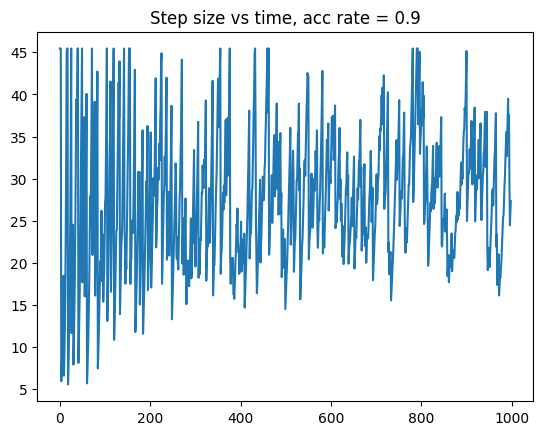

In [61]:
numbers_floats2 = [float(n) for n in numbers2.split("\n")[1:-1]]
import matplotlib.pyplot as plt

plt.plot(numbers_floats2)
# plt.xlabel('Index')
# plt.ylabel('Value')
plt.title('Step size vs time, acc rate = 0.9')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the CSV file
df1 = pd.read_csv('../omelyan10.csv')

df2 = pd.read_csv("../omelyan.csv")

df = pd.concat([df1, df2])
# df = df2

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')


x = np.linspace(10, 1000000, 100)
y = x**(-1/8)
y2 = x**(-1/4)
sns.lineplot(x=x,y=y)
sns.lineplot(x=x,y=y2)


plot = sns.lineplot(data=df, x="dims", y="ESS AVG", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()

df


initial state slow IntegratorState(position=Array([ 1.3169813 , -0.41919532,  0.5067563 ,  0.9934983 , -0.13618737,
       -0.35293955, -0.93901944,  1.0947791 ,  0.40323403,  0.5926218 ],      dtype=float32), momentum=Array([ 0.01204528, -0.48100027, -0.39853704,  0.25562263, -0.03317343,
       -0.17174499,  0.21114339,  0.5681493 ,  0.28363588, -0.25670546],      dtype=float32), logdensity=Array(-2.945608, dtype=float32), logdensity_grad=Array([-1.3169813 ,  0.41919532, -0.5067563 , -0.9934983 ,  0.13618737,
        0.35293955,  0.93901944, -1.0947791 , -0.40323403, -0.5926218 ],      dtype=float32))


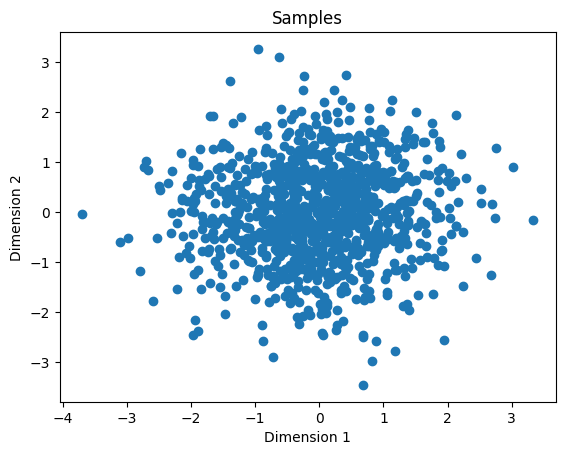

In [9]:
import jax
import sys
import blackjax
sys.path.append("../")
from benchmarks.inference_models import Banana, StandardNormal
from benchmarks.sampling_algorithms import run_unadjusted_mclmc_no_tuning, run_unadjusted_mclmc_no_tuning_slow

model = StandardNormal(10)
# model = Banana()

key1 = jax.random.PRNGKey(3)

init_key, state_key, run_key = jax.random.split(key1, 3)
initial_position = model.sample_init(init_key)
unadjusted_initial_state = blackjax.mcmc.mclmc.init(
    position=initial_position, logdensity_fn=model.logdensity_fn, rng_key=state_key
)


_, _,_, samples = run_unadjusted_mclmc_no_tuning_slow(
                # L=0.2,
                # step_size=5.34853,
                step_size=-3.56,
                L=-2.642,
                # step_size=7.094059,
                # L=7.147943,
                integrator_type='mclachlan',
                initial_state=unadjusted_initial_state,
                sqrt_diag_cov=1.0,
                return_ess_corr=True
            )(
                model=model,
                num_steps=1000,
                initial_position=None,
                key=jax.random.PRNGKey(0)
            )

import matplotlib.pyplot as plt

plt.plot(samples[:, 0], samples[:, 1], 'o')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Samples')
plt.show()


In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the CSV file
df1 = pd.read_csv('../omelyan10.csv')

# 
# Specify the directory where the files are located
directory = Path('/global/homes/r/reubenh/MicroCanonicalHMC/')

# Use glob to find files starting with "omelyan"
files = list(directory.glob('omelyan*'))


# df2 = pd.read_csv("../omelyan.csv")

# df = pd.concat([df1, df2])
# df = pd.concat(pd.read_csv(file) for file in files)
df = df1

# filter df for just omelyan
# df = df[df['integrator'] == 'omelyan']
# df['sampler']

# Plot the ess_avg against dimension on a log scale
# plt.plot(df['dims'], df['ESS'])
# plt.xscale('log')


x = np.linspace(10, 1000000, 100)
y = x**(-1/8)
y2 = x**(-1/4)
sns.lineplot(x=x,y=y)
sns.lineplot(x=x,y=y2)


plot = sns.lineplot(data=df, x="dims", y="ESS AVG", hue="sampler", style="integrator")
plot.set(xscale='log')
plot.set(yscale='log')
plt.xlabel('Dimension')
plt.ylabel('ESS Average')
plt.title('ESS Average vs Dimension')
plt.show()

df
